In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from nltk import word_tokenize
from nltk.corpus import stopwords
import sklearn
#import sklearn_crfsuite
#from sklearn_crfsuite import scorers
#from sklearn_crfsuite import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
from sklearn import metrics

C:\Users\acharya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


 # merge_from_ofoct.txt contains all labels and texts from scientific papers - Merged
data = open('labeled_sentences (1).txt').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    #print(content)
    labels.append(content[0])
    filtered_sentence = [w.lower() for w in content[1:] if not w in stopwords]
    texts.append(filtered_sentence)

    
#if not dataframe ,lower and upper du problem ide 
import pandas, xgboost, numpy, textblob, string    
trainDF = pandas.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels


In [4]:
temp =[]
temp_len=0
for item2 in texts:
    temp.append(" ".join(item2))
    temp_len = temp_len+len(texts)
print(len(temp))
print(temp_len)
print(type(temp))

trainDF['text1'] = temp

trainDF.head()

18627
346965129
<class 'list'>


,text,label,text1
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte..."
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia..."
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...


In [5]:
trainDF['punctuation_count'] = trainDF['text1'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['char_count'] = trainDF['text1'].apply(len)
trainDF['word_count'] = trainDF['text1'].apply(lambda x: len(x.split()))
trainDF.head()

,text,label,text1,punctuation_count,char_count,word_count
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9


In [6]:
import pandas, xgboost, numpy, textblob, string    

In [7]:
import pandas, xgboost, numpy, textblob, string    
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
  
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['text1'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['text1'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['text1'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['text1'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['text1'].apply(lambda x: check_pos_tag(x, 'pron'))
trainDF.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text,label,text1,punctuation_count,char_count,word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11,6,2,2,0,0
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25,12,5,3,3,0
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10,4,1,3,1,0
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8,4,2,1,1,0
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9,5,0,4,0,0


In [8]:

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punt(text):
    text_nopunkt ="".join([char for char in text if char not in string.punctuation])
    return text_nopunkt

trainDF['text_clean'] = trainDF['text1'].apply(lambda x: remove_punt(x))
trainDF.head()

,text,label,text1,punctuation_count,char_count,word_count,noun_count,verb_count,adj_count,adv_count,pron_count,text_clean
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11,6,2,2,0,0,minimum description length principle online se...
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25,12,5,3,3,0,underlying model class discrete total expected...
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10,4,1,3,1,0,mdl general one loss bounds finite exponential...
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8,4,2,1,1,0,show even case model class contains bernoulli ...
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9,5,0,4,0,0,derive new upper bound prediction error counta...


In [10]:
## tokenization
import re
def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens

trainDF['text_tokenized'] = trainDF['text_clean'].apply(lambda x: tokenize(x.lower()))
trainDF.head()

,text,label,text1,punctuation_count,char_count,word_count,noun_count,verb_count,adj_count,adv_count,pron_count,text_clean,text_tokenized
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11,6,2,2,0,0,minimum description length principle online se...,"[minimum, description, length, principle, onli..."
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25,12,5,3,3,0,underlying model class discrete total expected...,"[underlying, model, class, discrete, total, ex..."
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10,4,1,3,1,0,mdl general one loss bounds finite exponential...,"[mdl, general, one, loss, bounds, finite, expo..."
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8,4,2,1,1,0,show even case model class contains bernoulli ...,"[show, even, case, model, class, contains, ber..."
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9,5,0,4,0,0,derive new upper bound prediction error counta...,"[derive, new, upper, bound, prediction, error,..."


In [11]:
#stopwords
import nltk
stopword = nltk.corpus.stopwords.words('english')

In [12]:
#3 stopwords
def remove_stopwords(tokenized_list):
    text_stop = [word for word in tokenized_list if word not in stopword]
    return text_stop
trainDF['text_nostop'] = trainDF['text_tokenized'].apply(lambda x: remove_stopwords(x))
trainDF.head()

,text,label,text1,punctuation_count,char_count,word_count,noun_count,verb_count,adj_count,adv_count,pron_count,text_clean,text_tokenized,text_nostop
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11,6,2,2,0,0,minimum description length principle online se...,"[minimum, description, length, principle, onli...","[minimum, description, length, principle, onli..."
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25,12,5,3,3,0,underlying model class discrete total expected...,"[underlying, model, class, discrete, total, ex...","[underlying, model, class, discrete, total, ex..."
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10,4,1,3,1,0,mdl general one loss bounds finite exponential...,"[mdl, general, one, loss, bounds, finite, expo...","[mdl, general, one, loss, bounds, finite, expo..."
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8,4,2,1,1,0,show even case model class contains bernoulli ...,"[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contains, ber..."
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9,5,0,4,0,0,derive new upper bound prediction error counta...,"[derive, new, upper, bound, prediction, error,...","[derive, new, upper, bound, prediction, error,..."


In [13]:
import nltk
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def stemming(tokenized_list):
    text = [ps.stem(word) for word in tokenized_list] 
    return text

trainDF['text_stemmed'] = trainDF['text_nostop'].apply(lambda x: stemming(x))
trainDF.head()

,text,label,text1,punctuation_count,char_count,word_count,noun_count,verb_count,adj_count,adv_count,pron_count,text_clean,text_tokenized,text_nostop,text_stemmed
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11,6,2,2,0,0,minimum description length principle online se...,"[minimum, description, length, principle, onli...","[minimum, description, length, principle, onli...","[minimum, descript, length, principl, onlin, s..."
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25,12,5,3,3,0,underlying model class discrete total expected...,"[underlying, model, class, discrete, total, ex...","[underlying, model, class, discrete, total, ex...","[underli, model, class, discret, total, expect..."
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10,4,1,3,1,0,mdl general one loss bounds finite exponential...,"[mdl, general, one, loss, bounds, finite, expo...","[mdl, general, one, loss, bounds, finite, expo...","[mdl, gener, one, loss, bound, finit, exponent..."
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8,4,2,1,1,0,show even case model class contains bernoulli ...,"[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contain, bern..."
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9,5,0,4,0,0,derive new upper bound prediction error counta...,"[derive, new, upper, bound, prediction, error,...","[derive, new, upper, bound, prediction, error,...","[deriv, new, upper, bound, predict, error, cou..."


In [14]:
##lemnatize
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemnatize(tokenized_list):
    text = [wn.lemmatize(word) for word in tokenized_list] 
    return text

trainDF['text_lemnatized'] = trainDF['text_nostop'].apply(lambda x: lemnatize(x))
trainDF.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label,text1,punctuation_count,char_count,word_count,noun_count,verb_count,adj_count,adv_count,pron_count,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemnatized
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11,6,2,2,0,0,minimum description length principle online se...,"[minimum, description, length, principle, onli...","[minimum, description, length, principle, onli...","[minimum, descript, length, principl, onlin, s...","[minimum, description, length, principle, onli..."
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25,12,5,3,3,0,underlying model class discrete total expected...,"[underlying, model, class, discrete, total, ex...","[underlying, model, class, discrete, total, ex...","[underli, model, class, discret, total, expect...","[underlying, model, class, discrete, total, ex..."
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10,4,1,3,1,0,mdl general one loss bounds finite exponential...,"[mdl, general, one, loss, bounds, finite, expo...","[mdl, general, one, loss, bounds, finite, expo...","[mdl, gener, one, loss, bound, finit, exponent...","[mdl, general, one, loss, bound, finite, expon..."
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8,4,2,1,1,0,show even case model class contains bernoulli ...,"[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contain, bern...","[show, even, case, model, class, contains, ber..."
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9,5,0,4,0,0,derive new upper bound prediction error counta...,"[derive, new, upper, bound, prediction, error,...","[derive, new, upper, bound, prediction, error,...","[deriv, new, upper, bound, predict, error, cou...","[derive, new, upper, bound, prediction, error,..."


In [15]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [16]:
## len of each text : len of characters minus white space 
trainDF['body_len'] = trainDF['text1'].apply(lambda x : len(x) - x.count(" "))
trainDF.head()

,text,label,text1,punctuation_count,char_count,word_count,noun_count,verb_count,adj_count,adv_count,pron_count,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemnatized,body_len
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11,6,2,2,0,0,minimum description length principle online se...,"[minimum, description, length, principle, onli...","[minimum, description, length, principle, onli...","[minimum, descript, length, principl, onlin, s...","[minimum, description, length, principle, onli...",94
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25,12,5,3,3,0,underlying model class discrete total expected...,"[underlying, model, class, discrete, total, ex...","[underlying, model, class, discrete, total, ex...","[underli, model, class, discret, total, expect...","[underlying, model, class, discrete, total, ex...",195
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10,4,1,3,1,0,mdl general one loss bounds finite exponential...,"[mdl, general, one, loss, bounds, finite, expo...","[mdl, general, one, loss, bounds, finite, expo...","[mdl, gener, one, loss, bound, finit, exponent...","[mdl, general, one, loss, bound, finite, expon...",62
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8,4,2,1,1,0,show even case model class contains bernoulli ...,"[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contain, bern...","[show, even, case, model, class, contains, ber...",52
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9,5,0,4,0,0,derive new upper bound prediction error counta...,"[derive, new, upper, bound, prediction, error,...","[derive, new, upper, bound, prediction, error,...","[deriv, new, upper, bound, predict, error, cou...","[derive, new, upper, bound, prediction, error,...",59


In [17]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopword])
    return text

trainDF['cleaned_text'] = trainDF['text1'].apply(lambda x: clean_text(x))
trainDF.head()

,text,label,text1,punctuation_count,char_count,word_count,noun_count,verb_count,adj_count,adv_count,pron_count,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemnatized,body_len,cleaned_text
0,"[minimum, description, length, principle, onli...",MISC,minimum description length principle online se...,1,104,11,6,2,2,0,0,minimum description length principle online se...,"[minimum, description, length, principle, onli...","[minimum, description, length, principle, onli...","[minimum, descript, length, principl, onlin, s...","[minimum, description, length, principle, onli...",94,minimum descript length principl onlin sequenc...
1,"[underlying, model, class, discrete,, total, e...",MISC,"underlying model class discrete, total expecte...",8,219,25,12,5,3,3,0,underlying model class discrete total expected...,"[underlying, model, class, discrete, total, ex...","[underlying, model, class, discrete, total, ex...","[underli, model, class, discret, total, expect...","[underlying, model, class, discrete, total, ex...",195,underli model class discret total expect squar...
2,"[mdl,, general, one, loss, bounds, finite, exp...",MISC,"mdl, general one loss bounds finite exponentia...",1,71,10,4,1,3,1,0,mdl general one loss bounds finite exponential...,"[mdl, general, one, loss, bounds, finite, expo...","[mdl, general, one, loss, bounds, finite, expo...","[mdl, gener, one, loss, bound, finit, exponent...","[mdl, general, one, loss, bound, finite, expon...",62,mdl gener one loss bound finit exponenti large...
3,"[show, even, case, model, class, contains, ber...",AIMX,show even case model class contains bernoulli ...,0,59,8,4,2,1,1,0,show even case model class contains bernoulli ...,"[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contains, ber...","[show, even, case, model, class, contain, bern...","[show, even, case, model, class, contains, ber...",52,show even case model class contain bernoulli d...
4,"[derive, new, upper, bound, prediction, error,...",OWNX,derive new upper bound prediction error counta...,0,67,9,5,0,4,0,0,derive new upper bound prediction error counta...,"[derive, new, upper, bound, prediction, error,...","[derive, new, upper, bound, prediction, error,...","[deriv, new, upper, bound, predict, error, cou...","[derive, new, upper, bound, prediction, error,...",59,deriv new upper bound predict error countabl b...


In [18]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer= clean_text)
x_tfidf =tfidf_vect.fit_transform(trainDF['text1'])
print(x_tfidf.shape)
#print(tfidf_vect.get_feature_names())

(18627, 11068)


C:\Users\acharya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


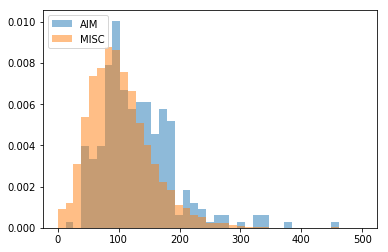

In [26]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0,500,40)
pyplot.hist(trainDF[trainDF['label']== 'AIMX']['body_len'],bins,alpha= 0.5, normed =True, label ='AIM')
pyplot.hist(trainDF[trainDF['label']== 'MISC']['body_len'],bins,alpha= 0.5, normed =True, label ='MISC')
pyplot.legend(loc="upper left")
pyplot.show()

C:\Users\acharya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


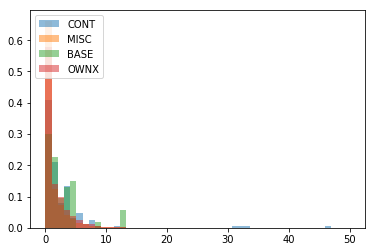

In [27]:
bins = np.linspace(0,50,50)
pyplot.hist(trainDF[trainDF['label']== 'CONT']['punctuation_count'],bins,alpha= 0.5, normed =True, label ='CONT')
pyplot.hist(trainDF[trainDF['label']== 'MISC']['punctuation_count'],bins,alpha= 0.5, normed =True, label ='MISC')
pyplot.hist(trainDF[trainDF['label']== 'BASE']['punctuation_count'],bins,alpha= 0.5, normed =True, label ='BASE')
pyplot.hist(trainDF[trainDF['label']== 'OWNX']['punctuation_count'],bins,alpha= 0.5, normed =True, label ='OWNX')


pyplot.legend(loc="upper left")
pyplot.show()

In [28]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(trainDF['text1'])

In [29]:
import pandas as pd
X_features = pd.concat([trainDF['body_len'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,0,1,2,3,4,5,6,7,8,...,11058,11059,11060,11061,11062,11063,11064,11065,11066,11067
0,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
## classifcation with body length alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71492994, 0.83201804, 0.87196006])

In [33]:
import pandas as pd
X_features = pd.concat( [trainDF['punctuation_count'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,punctuation_count,0,1,2,3,4,5,6,7,8,...,11058,11059,11060,11061,11062,11063,11064,11065,11066,11067
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
## classifcation with punctuation count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71541311, 0.82879691, 0.87308745])

In [36]:
import pandas as pd
X_features = pd.concat( [trainDF['char_count'], pd.DataFrame(X_tfidf.toarray())], axis=1)
## classifcation with character count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=4)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.70603393, 0.77539188, 0.87459738, 0.86898625])

In [37]:
import pandas as pd
X_features = pd.concat( [trainDF['word_count'], pd.DataFrame(X_tfidf.toarray())], axis=1)
## classifcation with word count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=5)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.68008588, 0.78368223, 0.82067114, 0.87919463, 0.87597315])

In [38]:
X_features.head()

,word_count,0,1,2,3,4,5,6,7,8,...,11058,11059,11060,11061,11062,11063,11064,11065,11066,11067
0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
import pandas as pd
X_features = pd.concat( [trainDF['noun_count'], pd.DataFrame(X_tfidf.toarray())], axis=1)
## classifcation with noun count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.72169431, 0.82670317, 0.86906104])

In [40]:
import pandas as pd
X_features = pd.concat( [trainDF['verb_count'], pd.DataFrame(X_tfidf.toarray())], axis=1)
## classifcation with verb count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71895635, 0.82622   , 0.86696731])

In [41]:
import pandas as pd
X_features = pd.concat( [trainDF['pron_count'], pd.DataFrame(X_tfidf.toarray())], axis=1)
## classifcation with pronoun count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71943952, 0.82895796, 0.87340957])

In [42]:
import pandas as pd
X_features = pd.concat( [trainDF['adv_count'], pd.DataFrame(X_tfidf.toarray())], axis=1)
## classifcation with adverb count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71492994, 0.82863585, 0.87469802])

In [43]:
import pandas as pd
X_features = pd.concat( [trainDF['adj_count'], pd.DataFrame(X_tfidf.toarray())], axis=1)
## classifcation with adjective count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71589628, 0.82863585, 0.87163794])

In [44]:
import pandas as pd
X_features = pd.concat([trainDF['body_len'], trainDF['punctuation_count'],trainDF['char_count'] ,trainDF['word_count'],trainDF['noun_count'],trainDF['pron_count'],trainDF['verb_count'],trainDF['adv_count'],trainDF['adj_count'],pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punctuation_count,char_count,word_count,noun_count,pron_count,verb_count,adv_count,adj_count,0,...,11058,11059,11060,11061,11062,11063,11064,11065,11066,11067
0,94,1,104,11,6,0,2,0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,195,8,219,25,12,0,5,3,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,1,71,10,4,0,1,1,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,0,59,8,4,0,2,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,0,67,9,5,0,0,0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,X_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.70558866, 0.82315993, 0.87002738])

In [46]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_features,trainDF['label'])

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,max_depth=20, n_jobs=-1)
rf_model = rf.fit(x_train,y_train)

In [48]:
##gives top 10 important features
sorted(zip(rf_model.feature_importances_, x_train.columns),reverse= True)[0:10]

[(0.09192641638125773, 8645),
 (0.035936785793513996, 1639),
 (0.024135598048598737, 445),
 (0.024012698425992705, 8895),
 (0.02170962046391778, 2627),
 (0.021534920097496392, 7564),
 (0.01588896590926505, 'punctuation_count'),
 (0.014655980625690337, 7024),
 (0.014520543673453562, 7730),
 (0.012577603203754829, 4871)]

In [19]:
## Using Count vectorizer

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

count_vect = CountVectorizer(analyzer=clean_text)
Y_count = count_vect.fit_transform(trainDF['text1'])

In [50]:
import pandas as pd
Y_features = pd.concat([trainDF['body_len'], pd.DataFrame(Y_count.toarray())], axis=1)
Y_features.head()

,body_len,0,1,2,3,4,5,6,7,8,...,11058,11059,11060,11061,11062,11063,11064,11065,11066,11067
0,94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
## classifcation with body length alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71847318, 0.83314543, 0.87147689])

In [52]:
import pandas as pd
Y_features = pd.concat( [trainDF['punctuation_count'], pd.DataFrame(Y_count.toarray())], axis=1)
## classifcation with punctuation count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71074247, 0.83201804, 0.86326301])

In [20]:
import pandas as pd
Y_features = pd.concat( [trainDF['word_count'], pd.DataFrame(Y_count.toarray())], axis=1)
## classifcation with word count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.70913191, 0.82799163, 0.86600097])

In [21]:
import pandas as pd
Y_features = pd.concat( [trainDF['noun_count'], pd.DataFrame(Y_count.toarray())], axis=1)
## classifcation with noun count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71895635, 0.83314543, 0.86777259])

In [22]:
import pandas as pd
Y_features = pd.concat( [trainDF['pron_count'], pd.DataFrame(Y_count.toarray())], axis=1)
## classifcation with pronoun count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.72427122, 0.8336286 , 0.86100821])

In [23]:
import pandas as pd
Y_features = pd.concat( [trainDF['verb_count'], pd.DataFrame(Y_count.toarray())], axis=1)
## classifcation with pronoun count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.7076824 , 0.83201804, 0.86712836])

In [24]:
import pandas as pd
Y_features = pd.concat( [trainDF['adv_count'], pd.DataFrame(Y_count.toarray())], axis=1)
## classifcation with adjective count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.71412466, 0.82976325, 0.86487357])

In [25]:
import pandas as pd
Y_features = pd.concat( [trainDF['adj_count'], pd.DataFrame(Y_count.toarray())], axis=1)
## classifcation with adjective count alone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.70993719, 0.82670317, 0.86149138])

In [26]:
import pandas as pd
Y_features = pd.concat([trainDF['body_len'], trainDF['punctuation_count'],trainDF['char_count'] ,trainDF['word_count'],trainDF['noun_count'],trainDF['pron_count'],trainDF['verb_count'],trainDF['adv_count'],trainDF['adj_count'],pd.DataFrame(Y_count.toarray())], axis=1)
Y_features.head()

,body_len,punctuation_count,char_count,word_count,noun_count,pron_count,verb_count,adv_count,adj_count,0,...,11058,11059,11060,11061,11062,11063,11064,11065,11066,11067
0,94,1,104,11,6,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,195,8,219,25,12,0,5,3,3,0,...,0,0,0,0,0,0,0,0,0,0
2,62,1,71,10,4,0,1,1,3,0,...,0,0,0,0,0,0,0,0,0,0
3,52,0,59,8,4,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,59,0,67,9,5,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold= KFold(n_splits=3)
cross_val_score(rf,Y_features,trainDF['label'],cv=k_fold,scoring ='accuracy',n_jobs=-1)

array([0.70542761, 0.82412627, 0.87260428])